In [1]:
#Importing modules

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Climate_Ready_Boston_Social_Vulnerability is a geographic data file which shows
#the distribution of disadvantaged populations throughout Boston

map_df = gpd.read_file('Climate_Ready_Boston_Social_Vulnerability.geojson')

In [3]:
#load in data
map_df

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,geometry
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907,"POLYGON ((-71.08997 42.34393, -71.09020 42.343..."
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171,"POLYGON ((-71.08580 42.34334, -71.08505 42.342..."
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078,"POLYGON ((-71.07251 42.35546, -71.07230 42.355..."
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044,"POLYGON ((-71.07066 42.35186, -71.07046 42.351..."
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637,"POLYGON ((-71.10114 42.34777, -71.10087 42.347..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,1549,2820,1054.40,Roxbury,6.843967e+05,4191.466959,"POLYGON ((-71.07960 42.32417, -71.07941 42.324..."
176,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,1972,3746,1404.47,Roxbury,1.159715e+06,4789.149284,"POLYGON ((-71.08345 42.32866, -71.08337 42.328..."
177,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,1006,1957,804.02,Roxbury,6.155343e+05,4824.790469,"POLYGON ((-71.08879 42.32423, -71.08902 42.323..."
178,179,25025081400,6678367.07,153.3142,3003,1462,268,314,283,791,1074,2318,1185.22,Jamaica Plain,1.135953e+06,6170.176383,"POLYGON ((-71.09535 42.33156, -71.09490 42.331..."


where POP100_RE = Tract population count
HU100_RE = Tract housing unit count
TotDis = People with Disabilities
TotChild = Children
OlderAdult = Older Adults
Low_to_No = Low to No Income
LEP = Limited English Proficiency
POC2 = People of Color
MedIllnes = Medical Illness
Name = Neighborhood Name

In [4]:
#function to return number barplot of amount of times each
#boston neighborhood is referenced

def get_series(df, col, threshold, string_other='OTHER'):
    count_incidents=df[col].value_counts()
    mask = count_incidents > threshold
    tail_prob = count_incidents.loc[~mask].sum()
    count_incidents = count_incidents.loc[mask]
    count_incidents[string_other] = tail_prob
    return count_incidents    

<AxesSubplot:>

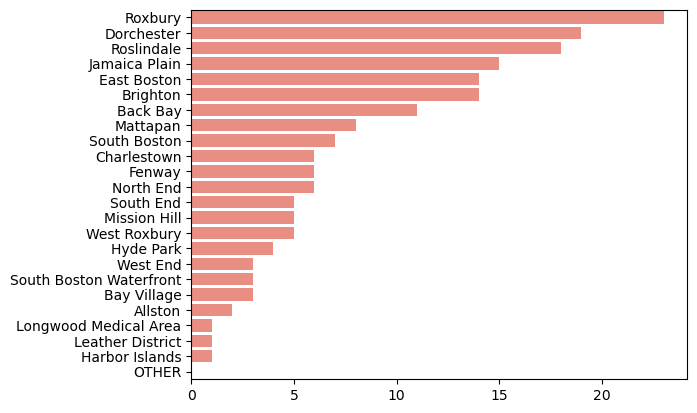

In [5]:
#different boston neighborhoods
incidents=get_series(map_df,'Name', 0)
sns.barplot(y=incidents.index, x=incidents.values, color="salmon")

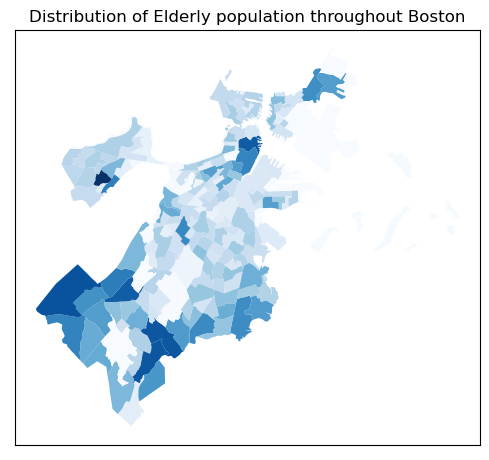

In [6]:
#plot of boston neighborhoods showing distribution of the elderly population
plt.rcParams['figure.figsize'] = (6,7)
map_df.plot(column= 'OlderAdult', cmap = "Blues")
plt.xticks([])
plt.yticks([])
plt.title('Distribution of Elderly population throughout Boston')

plt.show()

### An issue with using .geojson data is that it comes in a Polygon datatype. In order to run a machine learning algorithm on the data, we should convert it into (x,y) coordinates

In [7]:
from shapely.geometry import Polygon, mapping

In [8]:
#extract geometry data from our dataframe

poly_mapped = mapping(map_df['geometry'])

poly_coordinates = []

for i in range(len(poly_mapped['features'])):
    poly_coordinates.append(poly_mapped['features'][i]['geometry']['coordinates'][0])



In [9]:
#loop through the nested arrays to extract the (x, y) coordinates

xarray = []
yarray = []

for i in range(len(poly_coordinates)):
    
    x = []
    y = []
    
    for j in range(len(poly_coordinates[i])):
        if type(poly_coordinates[i][j][0]) != tuple:
            x.append(poly_coordinates[i][j][0])
            y.append(poly_coordinates[i][j][1])
        else:
            x.append(poly_coordinates[i][j][0][0])
            y.append(poly_coordinates[i][j][0][1])
        
        
    xarray.append(x)
    yarray.append(y)
    

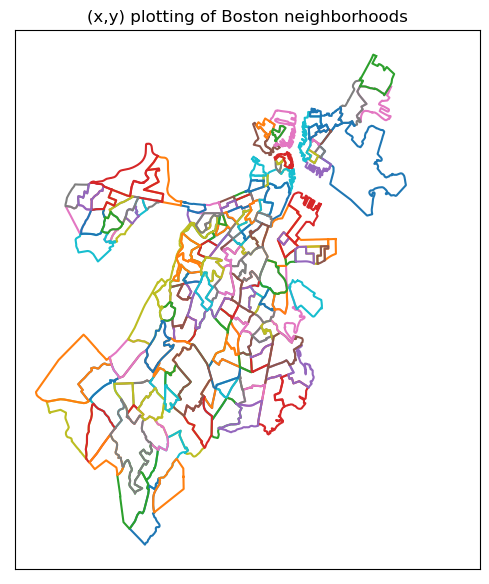

In [10]:
#plotting every set of coordinates
for i in range(180):
    plt.plot(xarray[i], yarray[i])
plt.xticks([])
plt.yticks([])

plt.title('(x,y) plotting of Boston neighborhoods')

plt.show()

### Now that we have these coordinates, we can find the center of each neighborhood to use for our machine learning clustering algorithm

In [11]:
#average over x and y
avg_x = []; avg_y = []
avg_p = []

for i in xarray:
    avg_x.append(np.mean(i))
   
    
for i in yarray:
    avg_y.append(np.mean(i))

#combine into avg point array of shape (x, y)
for i in range(len(avg_x)):
    avg_p += [[avg_x[i], avg_y[i]]]

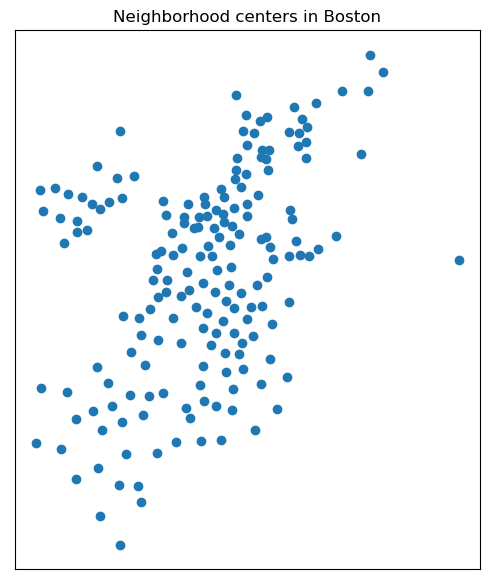

In [12]:
#plotting of the centers
plt.scatter(avg_x, avg_y)
plt.xticks([])
plt.yticks([])
plt.title('Neighborhood centers in Boston')
plt.show()

In [13]:
#add center coordinates to dataframe
map_df['center'] = avg_p

### We should now take a look at which features are most correlated with eachother

<AxesSubplot:>

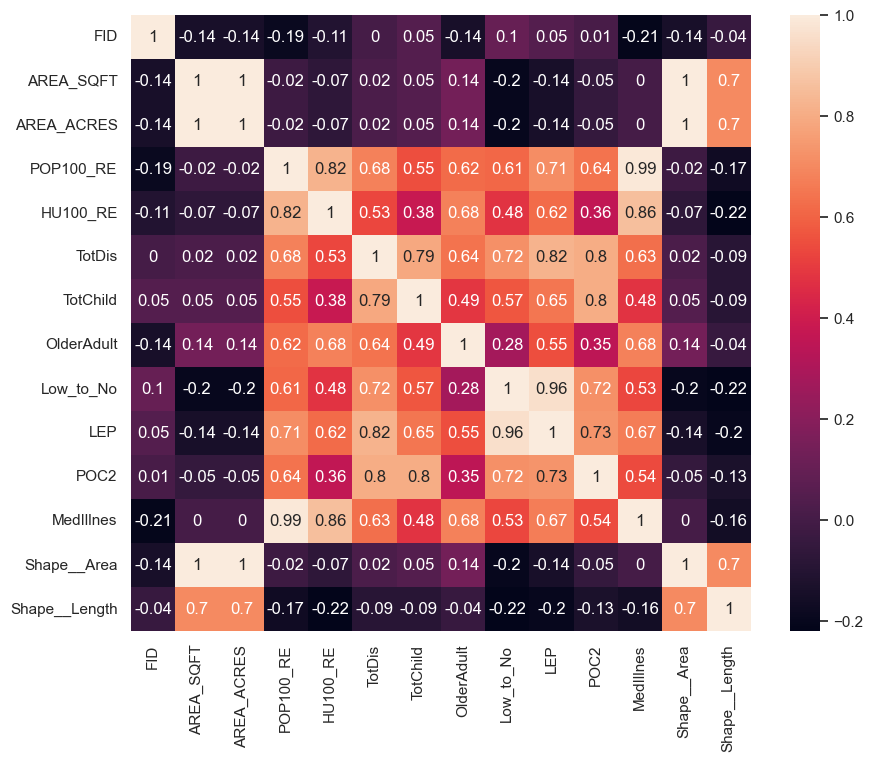

In [14]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,8)})

# compute the pair wise correlation for all columns  
correlation_matrix = map_df.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

This project will tackle the following points:

- Build resilient infrastructure, promote inclusive and sustainable industrialization and foster innovation.

- Reduce inequality within and among countries.

- Make cities and human settlements inclusive, safe, resilient and sustainable.


By analyzing this correlation matrix, we see how disadvantaged communities are associated. For example, in populations with low to no income, there is a high correlation with with population count, total disability, total child, Limited English Proficiency, and medical illness. 

By clustering these populations, we can find the points in town where these underserved communities need the most help. With this data, plans can be developed to build inclusive industrialization, reducing inequality and creating more inclusive and sustainable cities.

Let us take a simple average of a few of the features to see how the populations are distributed

In [15]:
weight = (map_df['POP100_RE'] + map_df['TotDis'] + map_df['TotChild'] + 
          map_df['LEP'] + map_df['POC2'] + map_df['MedIllnes']) / 6

In [16]:
#adding weight to dataframe
map_df['weight'] = weight

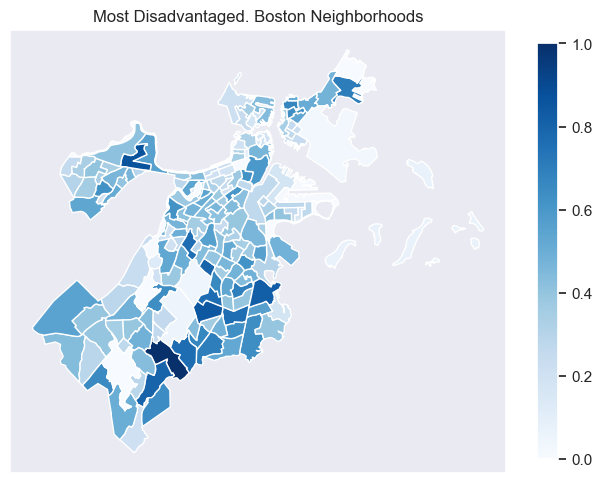

In [17]:
plt.rcParams['figure.figsize'] = (8,9)
map_df.plot(column= 'weight', cmap = "Blues")
plt.xticks([])
plt.yticks([])
plt.title('Most Disadvantaged. Boston Neighborhoods')
sm = plt.cm.ScalarMappable(cmap="Blues")
plt.colorbar(sm, shrink = 0.6)
plt.show()

While this gives us a good look into the social vulnerability distribution of the population, it would be advantageous to have a machine learning algorithm determine which neighborhoods are most at risk.

# k means clustering

In [18]:
#taking in the demographic data as features
X = map_df[['TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'MedIllnes', 'LEP', 'POP100_RE', 'HU100_RE' ]]

#scaling
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
boston_scaled = scaler.fit_transform(X)

#reducing dimensionality
pca = decomposition.PCA(n_components=2)
boston_pca = pca.fit_transform(boston_scaled)
print("Variance explained by the principle components:", pca.explained_variance_ratio_)
print("Ratio of variance explained: ", sum(pca.explained_variance_ratio_))



Variance explained by the principle components: [0.69100457 0.13983991]
Ratio of variance explained:  0.8308444754572339


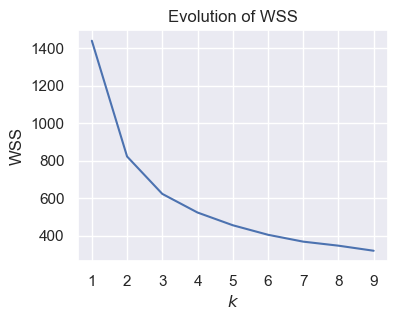

In [19]:
#Elbow Plot to find optimal number of clusters

from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(boston_scaled)
    y_kmeans = kmeans.predict(boston_scaled)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.rcParams['figure.figsize'] = (4,3)
    
plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

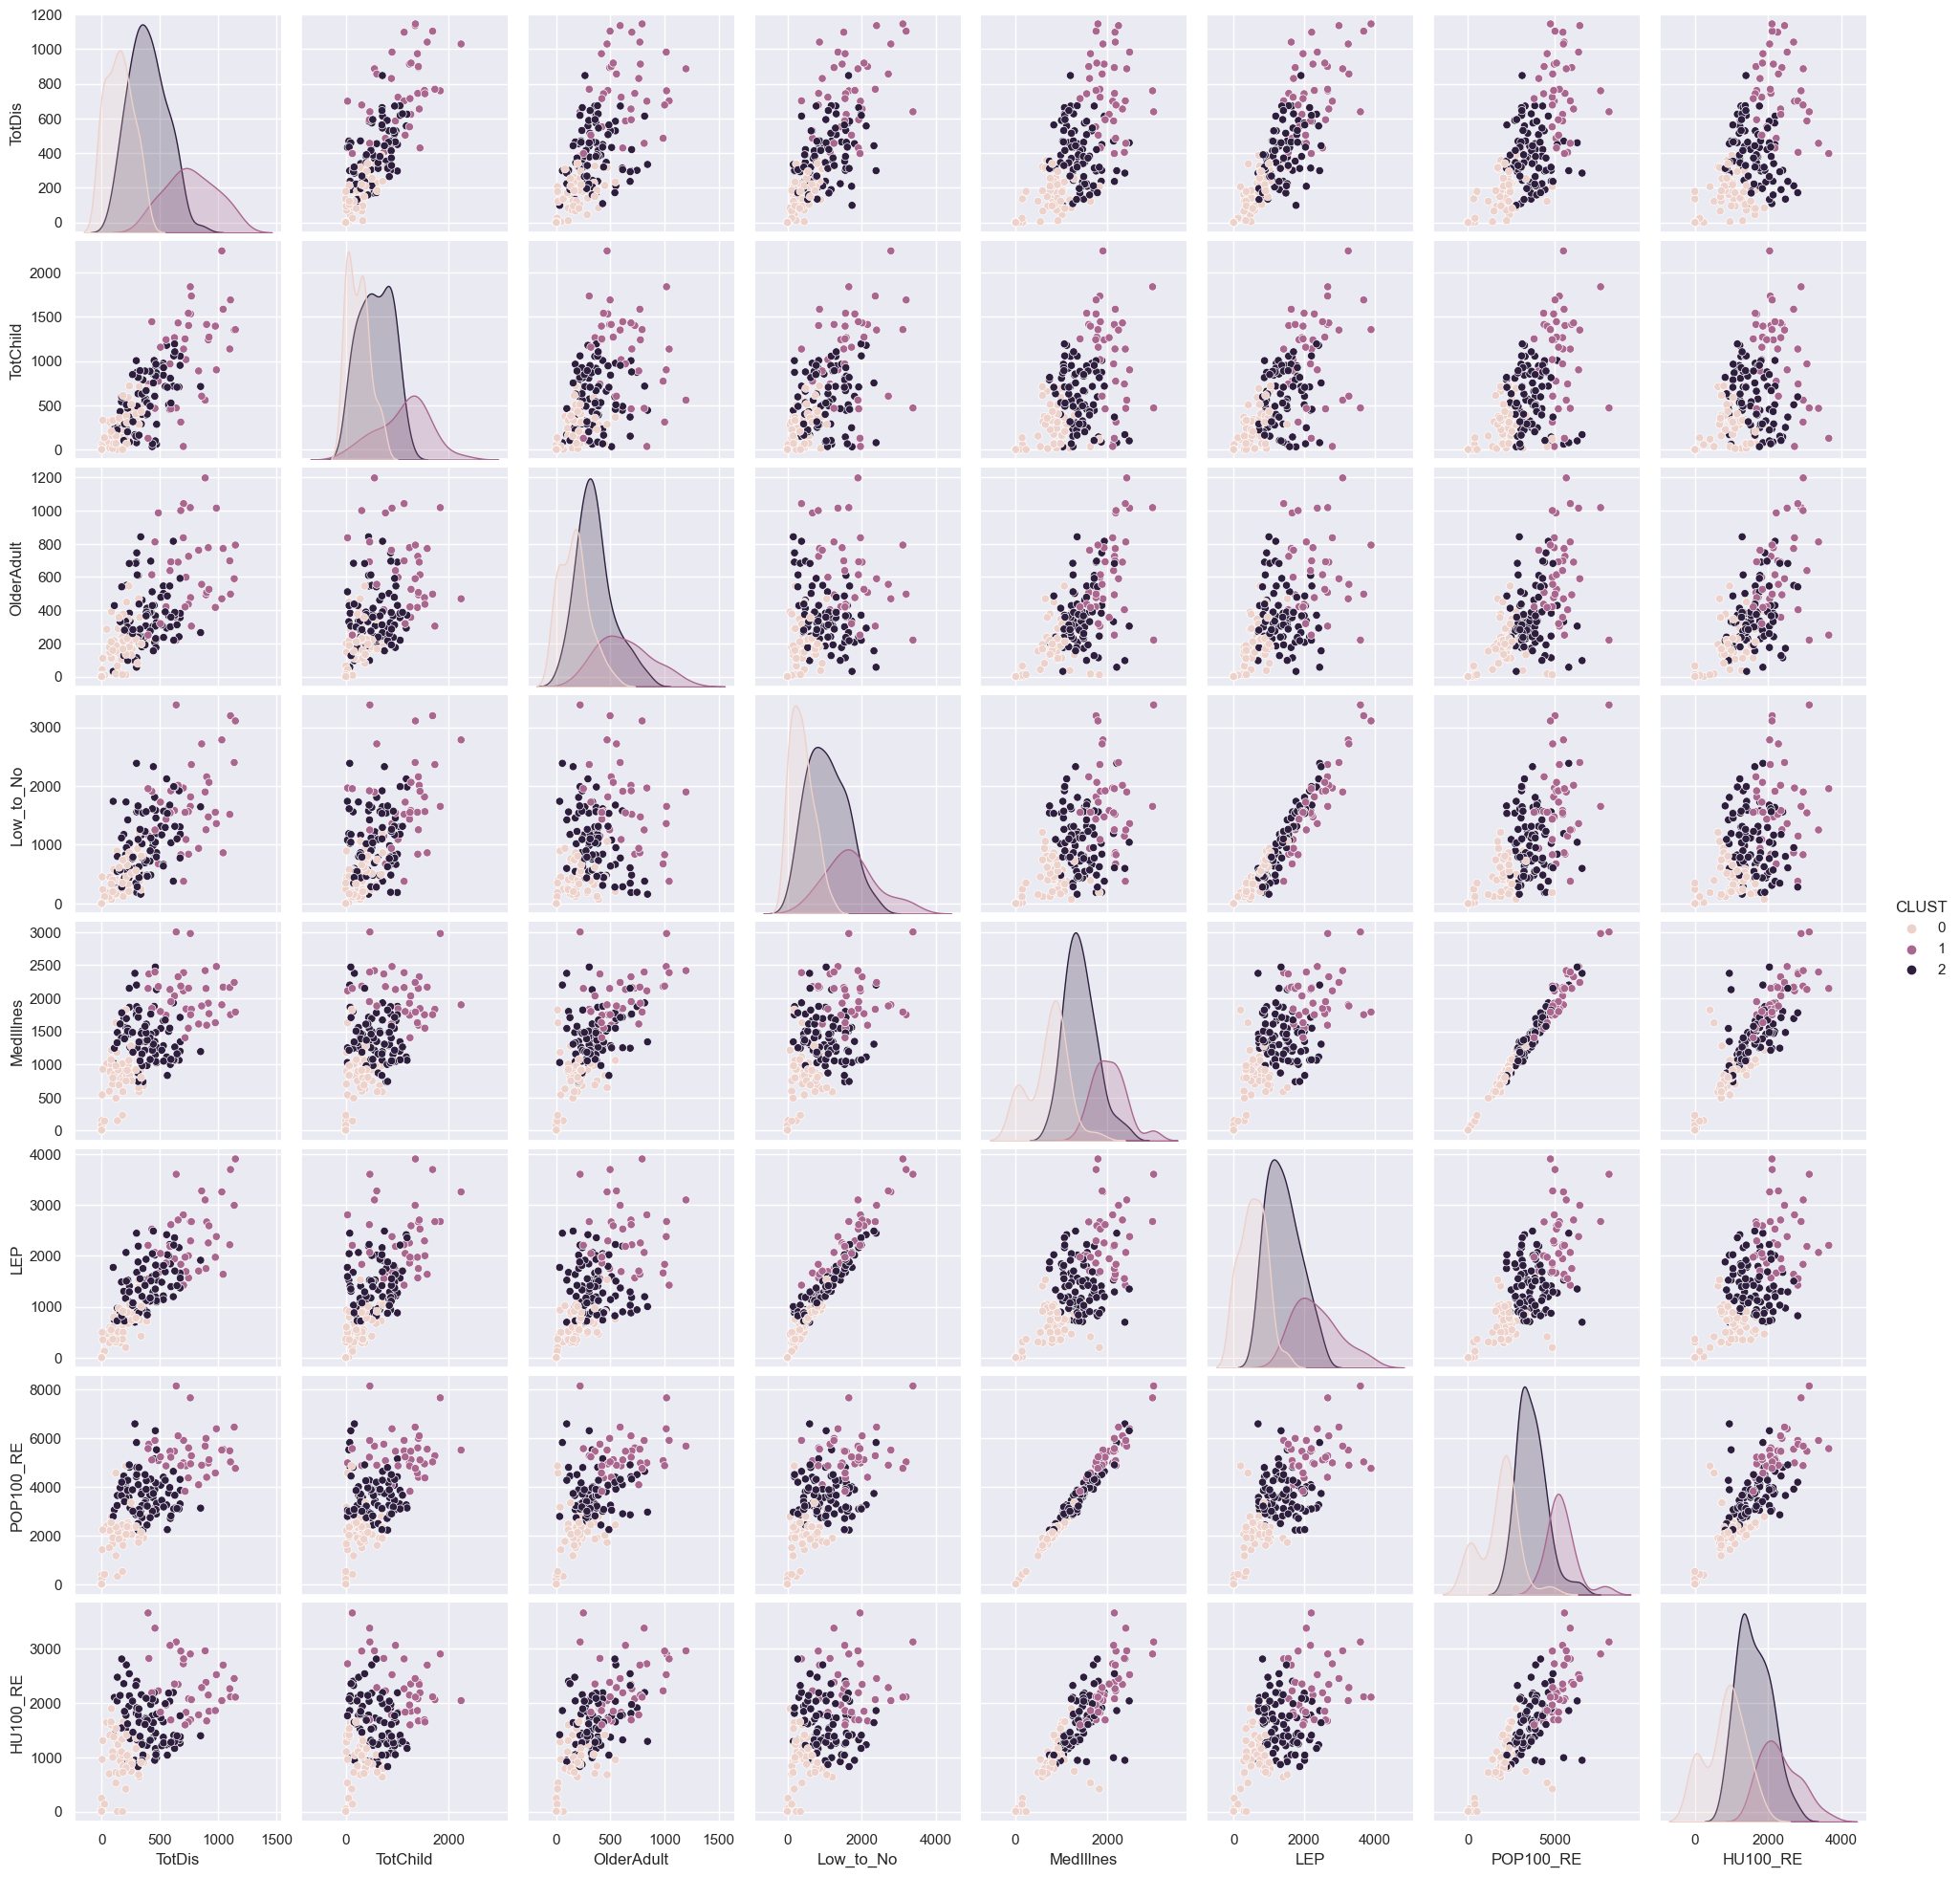

In [27]:
#pairplot of different features against eachother
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(boston_scaled)
y_kmeans = kmeans.predict(boston_scaled)

boston_df_kmeans = X.copy()
boston_df_kmeans['CLUST'] = y_kmeans
sns.pairplot(boston_df_kmeans, hue='CLUST')

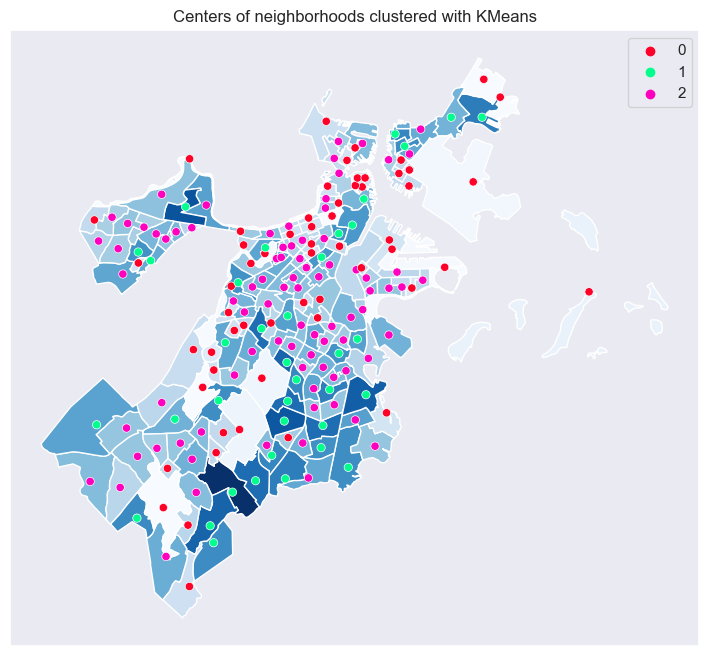

In [28]:
sns.set(rc={'figure.figsize':(10,8)})
map_df.plot(column= 'weight', cmap = "Blues")
map_df['predicted_cluster'] = y_kmeans
sns.scatterplot(x = avg_x, y = avg_y, hue = y_kmeans, palette = 'gist_rainbow')
plt.title("Centers of neighborhoods clustered with KMeans")
plt.xticks([])
plt.yticks([])
plt.show()

### From the plot, we see that the most disadvantaged areas (as decided by the machine learning algorithm) are those in cluster 1

### Let us see how this map compares with the distribution of public schools and community centers throughout boston

In [22]:
comm = gpd.read_file('Community_Centers.geojson')

In [23]:
schools =  gpd.read_file('Public_Schools.geojson')

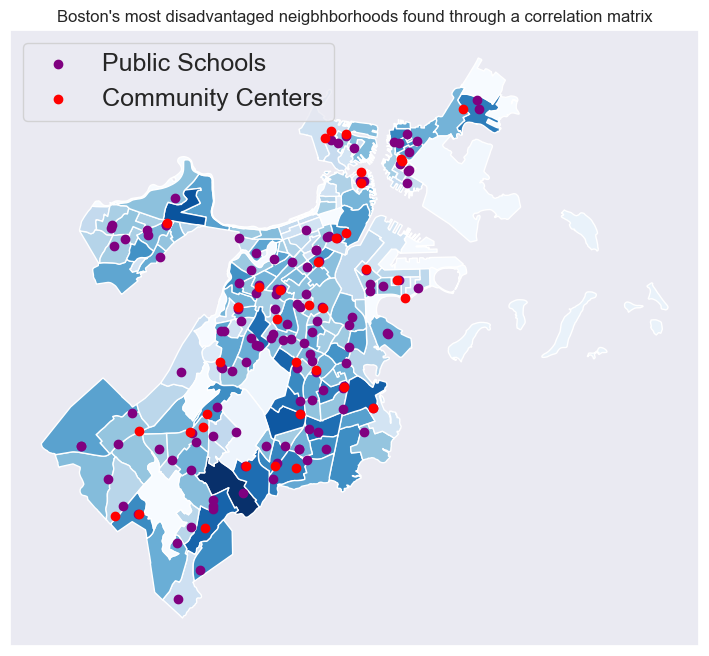

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 8))

map_df.plot(ax=ax1, column = 'weight', cmap = 'Blues')

schools.plot(ax = ax1, c = 'purple')
comm.plot(ax=ax1, c = 'red')
plt.xticks([])
plt.yticks([])

plt.legend(labels = ['Public Schools', 'Community Centers'], fontsize = 18)
plt.title("Boston's most disadvantaged neigbhborhoods found through a correlation matrix")
plt.show()

### It is ultimately the task of this projet to find where the next community center should go, as these locations promote social welfare and support for disadvantaged groups. 

In [25]:
#Extract dataframe with most affected areas
most_affected_areas = map_df.loc[map_df['predicted_cluster'] == 1]

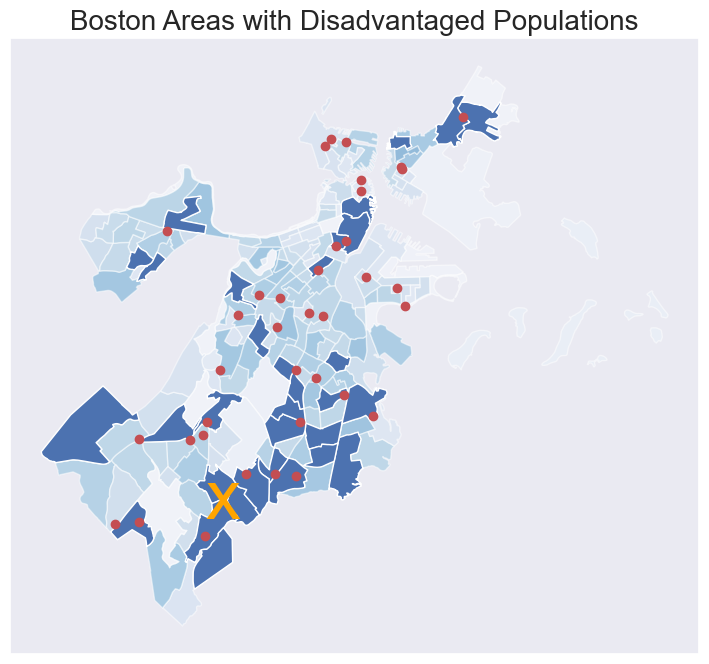

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 8))

map_df.plot(ax=ax1, column = 'weight', cmap = 'Blues', alpha = 0.5)

most_affected_areas.plot(ax = ax1)


comm.plot(ax=ax1, c = 'r')

plt.text(-71.121, 42.262, 'x', c = 'orange', fontsize = 50)

plt.xticks([])
plt.yticks([])
plt.title('Boston Areas with Disadvantaged Populations', fontsize = 20)
# plt.legend(labels = ['Community Centers'], fontsize = 20, loc = 'lower right')
plt.show()

### By analyzing the plot, we suggest placing a community center on the orange X, where the community needs it the most.